In [16]:
import matplotlib.pyplot as plt 
import numpy as np
import astropy.units as u
from astropy.io import fits
from astropy.wcs import WCS
from reproject import reproject_interp
from astropy.visualization import simple_norm
from astropy.visualization.wcsaxes import WCSAxes

import glob
from PIL import Image
import os
from IPython import display

#from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

import matplotlib.patches as mpatches
import pandas as pd

from scipy.interpolate import make_interp_spline
%matplotlib inline

In [4]:
#load data 
# observed data cube
data_cube = fits.getdata("/home/angeldavid/Desktop/Fedora/RESEARCH-INTERSHIPS/data_cubes/NGC7753/S2349+2904_HIcube2_clean_smooth_image_5_cube_kms.fits")
data_header =fits.getheader("/home/angeldavid/Desktop/Fedora/RESEARCH-INTERSHIPS/data_cubes/NGC7753/S2349+2904_HIcube2_clean_smooth_image_5_cube_kms.fits")

# optical image  
header_optical = fits.getheader("/home/angeldavid/Desktop/Fedora/RESEARCH-INTERSHIPS/data_cubes/NGC7753/ngc7753-optical.fits")
data_optical = fits.getdata("/home/angeldavid/Desktop/Fedora/RESEARCH-INTERSHIPS/data_cubes/NGC7753/ngc7753-optical.fits")
# mask 
data_mask= fits.getdata("/home/angeldavid/Desktop/Fedora/RESEARCH-INTERSHIPS/data_cubes/NGC7753/S2349+2904_HIcube2_clean_smooth_image_5_mask_kms.fits")
#
#data models
directory_7753 = "/home/angeldavid/Desktop/Fedora/RESEARCH-INTERSHIPS/data_cubes/NGC7753/"
data_model_ngc7753 = fits.getdata(directory_7753 + "output3/SoFiA_J234703.61+292835.6/SoFiA_J234703.61+292835.6mod_azim.fits")
header_ngc7753 = fits.getheader(directory_7753 + "output3/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6_0mom.fits")    
#
directory_7752 = "/home/angeldavid/Desktop/Fedora/RESEARCH-INTERSHIPS/data_cubes/NGC7752/"
data_model_ngc7752 = fits.getdata(directory_7752 + "output/SoFiA_J234703.61+292835.6/SoFiA_J234703.61+292835.6mod_azim.fits")
#
directory_companion = "/home/angeldavid/Desktop/Fedora/RESEARCH-INTERSHIPS/data_cubes/USNOA2-1125-19940303/"
data_model_companion = fits.getdata(directory_companion+"output/SoFiA_J234703.61+292835.6/SoFiA_J234703.61+292835.6mod_azim.fits")

In [88]:

# ngc7753
#data moment1
data_mom1_ngc7753 = fits.getdata(directory_7753+"output3/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6mod_1mom_azim.fits")
header_mom1_ngc7753 = fits.getheader(directory_7753+"output3/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6mod_1mom_azim.fits")
data_mom1_ngc7753_obs = fits.getdata(directory_7753+"output3/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6_1mom.fits")
#ngc7752
#data moment1
data_mom1_ngc7752 = fits.getdata(directory_7752+"output/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6mod_1mom_azim.fits")
data_mom1_ngc7752_obs = fits.getdata(directory_7752+"output/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6_1mom.fits")
#companion galaxy
#data moment1
data_mom1_companion = fits.getdata(directory_companion+"output/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6mod_1mom_azim.fits")
data_mom1_companion_obs = fits.getdata(directory_companion+"output/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6_1mom.fits")  

# Observational Data

In [4]:
ngc7753_mom0 = fits.getdata(directory_7753+"output3/SoFiA_J234703.61+292835.6/maps/SoFiA_J234703.61+292835.6_0mom.fits")
ngc7753_mom0_c = np.nan_to_num(ngc7753_mom0, nan=0.0)

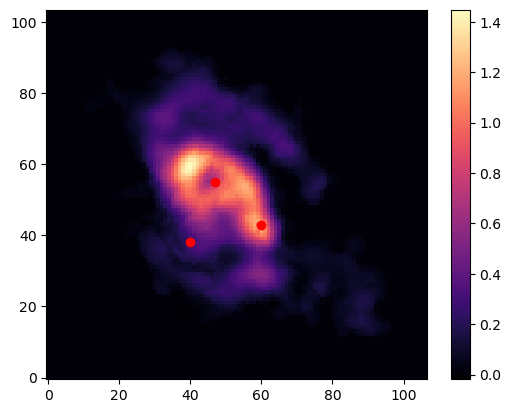

In [102]:
plt.imshow(ngc7753_mom0_c,origin='lower',cmap="magma")
plt.plot(60,43,'ro') 
plt.plot(40,38,'ro') 
plt.plot(47,55,'ro')
plt.colorbar()

In [76]:
wcs = WCS(header_ngc7753)

In [77]:
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 357.24920654 29.07100296 
CRPIX : -202.5 -191.0 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : -0.0016666670563 0.0016666670563 
NAXIS : 107  104

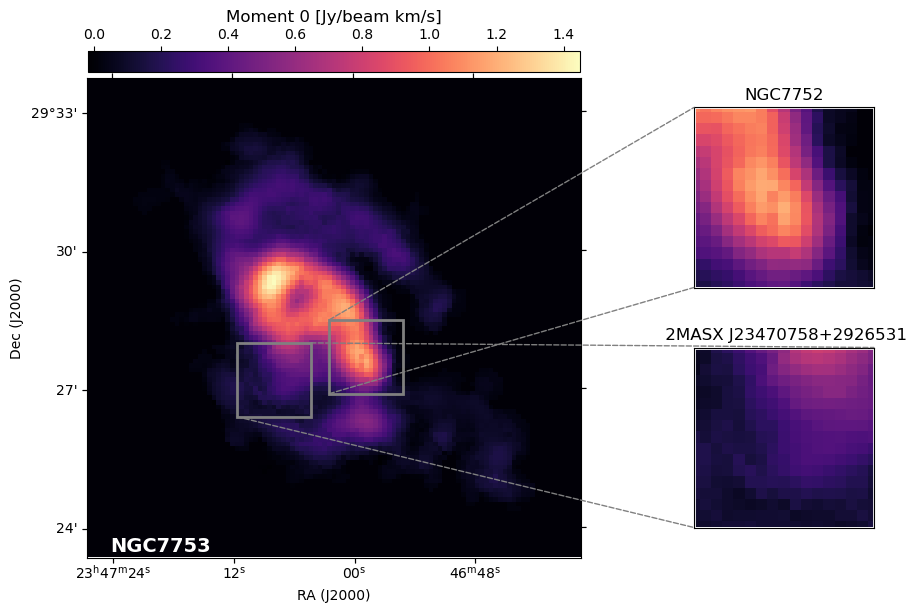

In [86]:

fig = plt.figure(figsize=(12, 6))

# Main image
ax_main = fig.add_axes([0.05, 0.1, 0.55, 0.8],projection=wcs)
im = ax_main.imshow(ngc7753_mom0_c, origin='lower', cmap="magma")
ax_main.set_xlabel('RA (J2000)')
ax_main.set_ylabel('Dec (J2000)')
ax_main.text(15.45, 0.95, 'NGC7753', fontsize=14, weight='bold', color='white', ha='center')

# Define zoom regions
zoom1_center = (60, 43)
zoom2_center = (40, 38)
zoom_size = 8

# Rectangle on main image for NGC7752
rect1_main = mpatches.Rectangle((zoom1_center[0]-zoom_size, zoom1_center[1]-zoom_size),
                                2*zoom_size, 2*zoom_size, edgecolor='gray', facecolor='none', lw=2)
ax_main.add_patch(rect1_main)

# Rectangle on main image for Companion
rect2_main = mpatches.Rectangle((zoom2_center[0]-zoom_size, zoom2_center[1]-zoom_size),
                                2*zoom_size, 2*zoom_size, edgecolor='gray', facecolor='none', lw=2)
ax_main.add_patch(rect2_main)

# Zoom panel for NGC7752
ax_zoom1 = fig.add_axes([0.55, 0.55, 0.3, 0.3])
ax_zoom1.imshow(ngc7753_mom0_c, origin='lower', cmap="magma")
ax_zoom1.set_xlim(zoom1_center[0]-zoom_size, zoom1_center[0]+zoom_size)
ax_zoom1.set_ylim(zoom1_center[1]-zoom_size, zoom1_center[1]+zoom_size)
ax_zoom1.set_xticks([])
ax_zoom1.set_yticks([])
ax_zoom1.set_title('NGC7752')
# Rectangle on zoom panel
rect1_zoom = mpatches.Rectangle((zoom1_center[0]-zoom_size, zoom1_center[1]-zoom_size),
                                2*zoom_size, 2*zoom_size, edgecolor='white', facecolor='none', lw=2)
ax_zoom1.add_patch(rect1_zoom)

# Zoom panel for Companion
ax_zoom2 = fig.add_axes([0.55, 0.15, 0.3, 0.3])
ax_zoom2.imshow(ngc7753_mom0_c, origin='lower', cmap="magma")
ax_zoom2.set_xlim(zoom2_center[0]-zoom_size, zoom2_center[0]+zoom_size)
ax_zoom2.set_ylim(zoom2_center[1]-zoom_size, zoom2_center[1]+zoom_size)
ax_zoom2.set_xticks([])
ax_zoom2.set_yticks([])
ax_zoom2.set_title(' 2MASX J23470758+2926531')
# Rectangle on zoom panel
rect2_zoom = mpatches.Rectangle((zoom2_center[0]-zoom_size, zoom2_center[1]-zoom_size),
                                2*zoom_size, 2*zoom_size, edgecolor='white', facecolor='none', lw=2)
ax_zoom2.add_patch(rect2_zoom)

# Connecting lines for NGC7752 (corners)
for (x, y) in [(zoom1_center[0]-zoom_size, zoom1_center[1]+zoom_size),
               (zoom1_center[0]-zoom_size, zoom1_center[1]-zoom_size)]:
    con = mpatches.ConnectionPatch(
        xyA=(x, y), coordsA=ax_main.transData,
        xyB=(x, y), coordsB=ax_zoom1.transData,
        color="gray", lw=1, linestyle='--')
    fig.add_artist(con)

# Connecting lines for Companion (corners)
for (x, y) in [(zoom2_center[0]+zoom_size, zoom2_center[1]+zoom_size),
               (zoom2_center[0]-zoom_size, zoom2_center[1]-zoom_size)]:
    con = mpatches.ConnectionPatch(
        xyA=(x, y), coordsA=ax_main.transData,
        xyB=(x, y), coordsB=ax_zoom2.transData,
        color="gray", lw=1, linestyle='--')
    fig.add_artist(con)

# Colorbar at the top
cbar_ax = fig.add_axes([0.12, 0.91, 0.41, 0.035])
cbar = plt.colorbar(im, cax=cbar_ax, orientation='horizontal')
cbar.ax.xaxis.set_label_position('top')
cbar.ax.xaxis.set_ticks_position('top')
cbar.set_label('Moment 0 [Jy/beam km/s]', fontsize=12)
plt.savefig("figuresReport/system_mom0_zoomed.png", dpi=300, bbox_inches='tight')
plt.show()

# Results

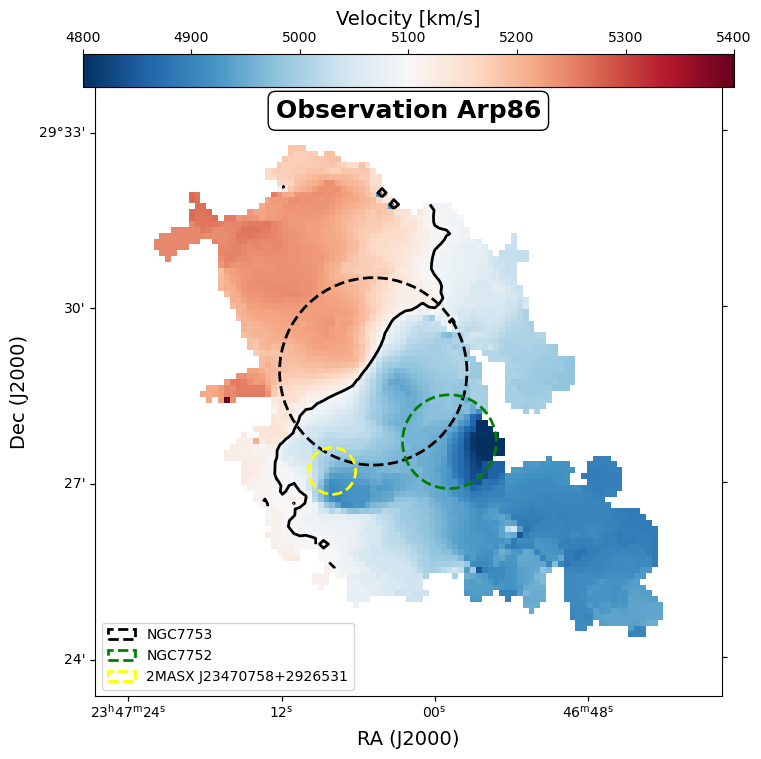

In [105]:
plt.figure(figsize=(9, 8))
ax = plt.subplot(111, projection=wcs)  # Use WCS for correct RA/Dec

# Moment 1 map (velocity field)
im = ax.imshow(data_mom1_ngc7753_obs, cmap='RdBu_r', origin='lower', vmin=4800, vmax=5400)

# add ciclers to highlight galaxies
circle0 = plt.Circle((47, 55), 16, color='black', linestyle='--', fill=False, lw=2,label='NGC7753')
circle1 = plt.Circle((60, 43), 8, color='green', linestyle='--', fill=False, lw=2,label='NGC7752')
circle2 = plt.Circle((40, 38), 4, color='yellow', linestyle='--', fill=False, lw=2,label='2MASX J23470758+2926531')
ax.add_patch(circle0)
ax.add_patch(circle1)
ax.add_patch(circle2)
# add the systemic velocity contour 
# Add systemic velocity contour (separating red/blue)
systemic_velocity = 5100  # km/s - adjust this value for NGC7753's systemic velocity
ax.contour(data_mom1_ngc7753_obs, levels=[systemic_velocity], colors='black', linewidths=2, origin='lower')

# Add colorbar
cbar = plt.colorbar(im, ax=ax, orientation='horizontal', location='top', shrink=0.83, pad=0.001)
cbar.set_label('Velocity [km/s]', fontsize=14)

# Add label box
ax.text(0.5, 0.95, 'Observation Arp86', fontsize=18, weight='bold', color='black',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=0.3),
        transform=ax.transAxes, ha='center')

ax.set_xlabel('RA (J2000)', fontsize=14)
ax.set_ylabel('Dec (J2000)', fontsize=14)
ax.legend(loc='lower left')
plt.tight_layout()
plt.savefig("figuresReport/arp-mom1-obs.png", dpi=300)
plt.show()

/tmp/ipykernel_25834/1297138545.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


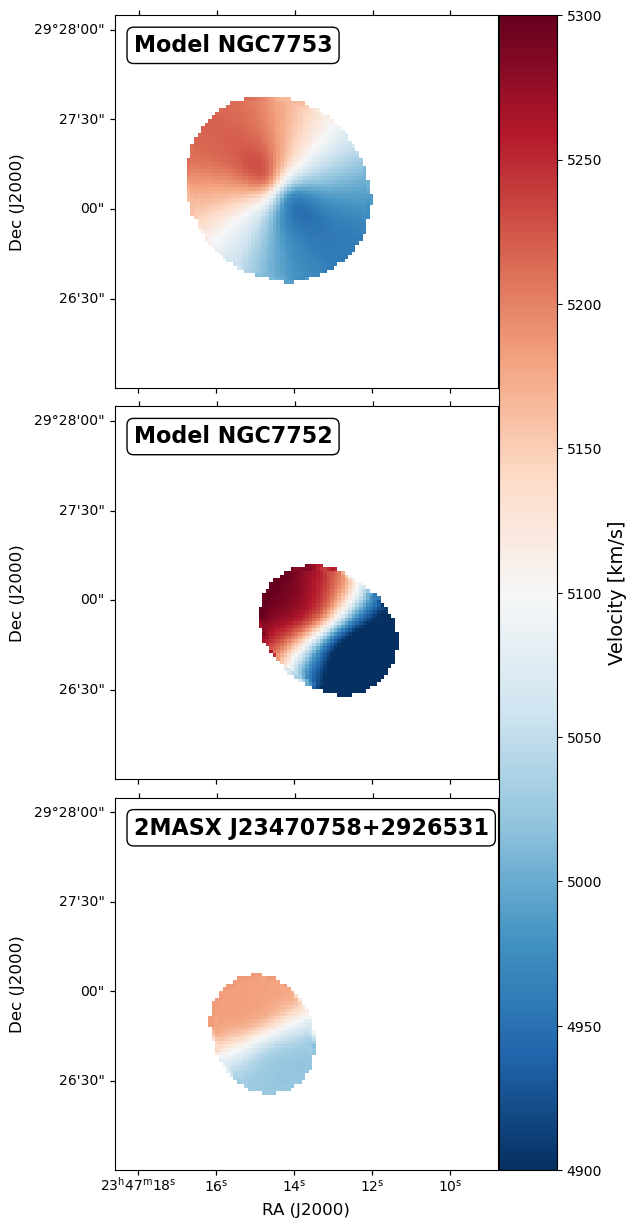

In [106]:
fig = plt.figure(figsize=(8, 15))

# Create subplots with minimal spacing
gs = fig.add_gridspec(3, 1, hspace=0.05)

# Panel 1: NGC7753
ax1 = fig.add_subplot(gs[0, 0], projection=WCS(header_optical))
im1 = ax1.imshow(data_mom1_ngc7753, cmap='RdBu_r', origin='lower', vmin=4900, vmax=5300)
ax1.text(0.05, 0.95, 'Model NGC7753', fontsize=16, weight='bold', color='black',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round',pad=0.3),
        transform=ax1.transAxes, ha='left', va='top')
ax1.set_ylabel('Dec (J2000)', fontsize=12)
ax1.tick_params(axis='x', labelsize=10, labelbottom=False)  # Hide x-tick labels
ax1.set_xticks([])  # Remove x-ticks completely

# Panel 2: NGC7752
ax2 = fig.add_subplot(gs[1, 0], projection=WCS(header_optical))
im2 = ax2.imshow(data_mom1_ngc7752, cmap='RdBu_r', origin='lower', vmin=4900, vmax=5000)
ax2.text(0.05, 0.95, 'Model NGC7752', fontsize=16, weight='bold', color='black',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round',pad=0.3),
        transform=ax2.transAxes, ha='left', va='top')
ax2.set_ylabel('Dec (J2000)', fontsize=12)
ax2.tick_params(axis='x', labelsize=10, labelbottom=False)  # Hide x-tick labels
ax2.set_xticks([])  # Remove x-ticks completely

# Panel 3: Companion Galaxy
ax3 = fig.add_subplot(gs[2, 0], projection=WCS(header_optical))
im3 = ax3.imshow(data_mom1_companion, cmap='RdBu_r', origin='lower', vmin=4900, vmax=5000)
ax3.text(0.05, 0.95, '2MASX J23470758+2926531', fontsize=16, weight='bold', color='black',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round',pad=0.3),
        transform=ax3.transAxes, ha='left', va='top')
ax3.set_xlabel('RA (J2000)', fontsize=12)  # Only bottom panel has x-label
ax3.set_ylabel('Dec (J2000)', fontsize=12)
ax3.tick_params(labelsize=10)

# Single colorbar on the right for all three panels
cbar = fig.colorbar(im1, ax=[ax1, ax2, ax3], location='right', shrink=1, pad=0.002)
cbar.set_label('Velocity [km/s]', fontsize=14)

plt.tight_layout()
plt.savefig("figuresReport/arp86-mom1-models.png", dpi=300, bbox_inches='tight')
plt.show()

In [5]:
rings_ngc7753 = pd.read_csv(directory_7753 + "output3/SoFiA_J234703.61+292835.6/rings_final2.txt", delim_whitespace=True)
rings_ngc7752 = pd.read_csv(directory_7752 + "output/SoFiA_J234703.61+292835.6/rings_final2.txt", delim_whitespace=True)
rings_companion = pd.read_csv(directory_companion + "output/SoFiA_J234703.61+292835.6/rings_final2.txt", delim_whitespace=True)

/tmp/ipykernel_5860/2467707397.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  rings_ngc7753 = pd.read_csv(directory_7753 + "output3/SoFiA_J234703.61+292835.6/rings_final2.txt", delim_whitespace=True)
/tmp/ipykernel_5860/2467707397.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  rings_ngc7752 = pd.read_csv(directory_7752 + "output/SoFiA_J234703.61+292835.6/rings_final2.txt", delim_whitespace=True)
/tmp/ipykernel_5860/2467707397.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  rings_companion = pd.read_csv(directory_companion + "output/SoFiA_J234703.61+292835.6/rings_final2.txt", delim_whitespace=True)


In [21]:
radius_ngc7753 = rings_ngc7753['RAD(arcs)']
vrot_ngc7753 = rings_ngc7753['VROT(km/s)']
pa_ngc7753 = rings_ngc7753['P.A.(deg)']
radius_ngc7752 = rings_ngc7752['RAD(arcs)']
vrot_ngc7752 = rings_ngc7752['VROT(km/s)']
pa_ngc7752 = rings_ngc7752['P.A.(deg)']   
radius_companion = rings_companion['RAD(arcs)']
vrot_companion = rings_companion['VROT(km/s)']
pa_companion = rings_companion['P.A.(deg)']

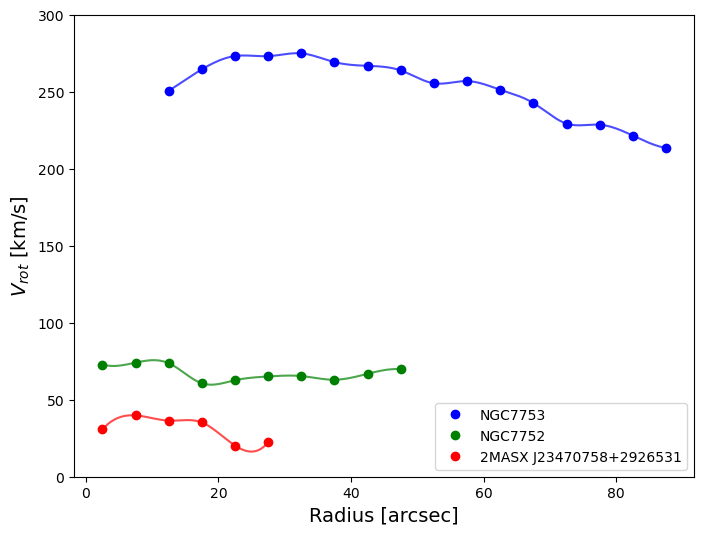

In [32]:
plt.figure(figsize=(8,6))

# NGC7753
plt.plot(radius_ngc7753, vrot_ngc7753, marker='o', linestyle='', color='b', label='NGC7753')
xnew_7753 = np.linspace(radius_ngc7753.min(), radius_ngc7753.max(), 300)
spl_7753 = make_interp_spline(radius_ngc7753, vrot_ngc7753, k=3)
plt.plot(xnew_7753, spl_7753(xnew_7753), color='b', alpha=0.7)

# NGC7752
plt.plot(radius_ngc7752, vrot_ngc7752, marker='o', linestyle='', color='g', label='NGC7752')
xnew_7752 = np.linspace(radius_ngc7752.min(), radius_ngc7752.max(), 300)
spl_7752 = make_interp_spline(radius_ngc7752, vrot_ngc7752, k=3)
plt.plot(xnew_7752, spl_7752(xnew_7752), color='g', alpha=0.7)

# Companion
plt.plot(radius_companion, vrot_companion, marker='o', linestyle='', color='r', label='2MASX J23470758+2926531')
xnew_comp = np.linspace(radius_companion.min(), radius_companion.max(), 300)
spl_comp = make_interp_spline(radius_companion, vrot_companion, k=3)
plt.plot(xnew_comp, spl_comp(xnew_comp), color='r', alpha=0.7)

plt.xlabel('Radius [arcsec]', fontsize=14)
plt.ylabel(r'$V_{rot}$ [km/s]', fontsize=14)
plt.ylim(0,300)
plt.legend()
plt.savefig("figuresReport/rotation-curves-arp86.png", dpi=300, bbox_inches='tight')
plt.show()

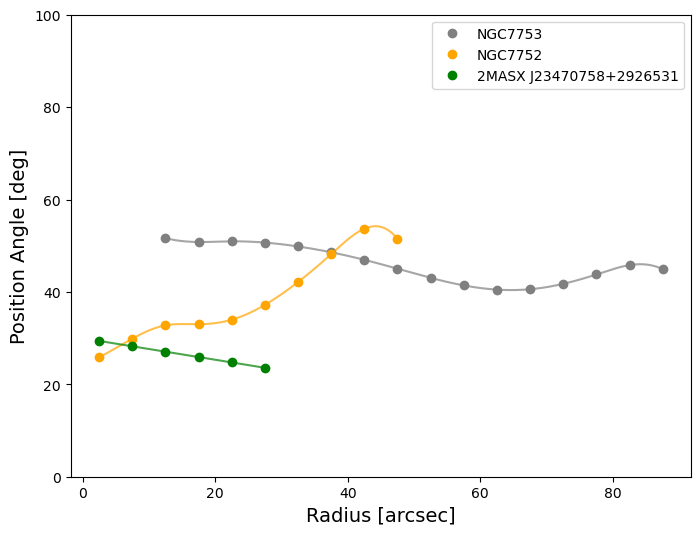

In [31]:
plt.figure(figsize=(8,6))

# NGC7753
plt.plot(radius_ngc7753, pa_ngc7753, marker='o', linestyle='', color='gray', label='NGC7753')
xnew_7753 = np.linspace(radius_ngc7753.min(), radius_ngc7753.max(), 300)
spl_7753 = make_interp_spline(radius_ngc7753, pa_ngc7753, k=3)
plt.plot(xnew_7753, spl_7753(xnew_7753), color='gray', alpha=0.7)

# NGC7752
plt.plot(radius_ngc7752, pa_ngc7752, marker='o', linestyle='', color='orange', label='NGC7752')
xnew_7752 = np.linspace(radius_ngc7752.min(), radius_ngc7752.max(), 300)
spl_7752 = make_interp_spline(radius_ngc7752, pa_ngc7752, k=3)
plt.plot(xnew_7752, spl_7752(xnew_7752), color='orange', alpha=0.7)

# Companion
plt.plot(radius_companion, pa_companion, marker='o', linestyle='', color='green', label='2MASX J23470758+2926531')
xnew_comp = np.linspace(radius_companion.min(), radius_companion.max(), 300)
spl_comp = make_interp_spline(radius_companion, pa_companion, k=3)
plt.plot(xnew_comp, spl_comp(xnew_comp), color='green', alpha=0.7)

plt.xlabel('Radius [arcsec]', fontsize=14)
plt.ylabel('Position Angle [deg]', fontsize=14)
plt.ylim(0,100)
plt.legend()
plt.savefig("figuresReport/position-angles-arp86.png", dpi=300, bbox_inches='tight')
plt.show()